In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re

##**dataset 1**

In [237]:
dataset1 = pd.read_csv("/content/software_requirements_extended (1).csv")
dataset1


Type                                        Requirement
0     PE  The system shall refresh the display every 60 ...
1     LF  The application shall match the color of the s...
2     US   If projected  the data must be readable.  On ...
3      A   The product shall be available during normal ...
4     US   If projected  the data must be understandable...
..   ...                                                ...
972   FR  There will be a designated phone number that u...
973   FR  Texts sent to that number will be sent to the ...
974   FR  If a question is not understood by our API, th...
975   FR  Upon the USB being plugged in the system shall...
976   FR  The system shall be able to handle 1000 custom...

[977 rows x 2 columns]

In [238]:
print(dataset1.dtypes)


Type           object
Requirement    object
dtype: object


In [239]:
print(dataset1.shape)


(977, 2)


In [240]:
print("Distribution of each requirement type:")
print(dataset1['Type'].value_counts())

Distribution of each requirement type:
Type
FR     312
F      209
NFR    110
US      63
O       58
SE      56
PE      54
LF      34
A       21
SC      21
MN      17
L       10
FT      10
PO       2
Name: count, dtype: int64


In [241]:
print("\nUnique requirement types in 'Type' column:")
print(dataset1['Type'].unique())


Unique requirement types in 'Type' column:
['PE' 'LF' 'US' 'A' 'SE' 'F' 'L' 'O' 'PO' 'SC' 'FT' 'MN' 'FR' 'NFR']


In [242]:
dataset_copy = dataset1.copy()


<ipython-input-243-caefe5801deb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset_copy, x='Type', order=dataset1['Type'].value_counts().index, palette='viridis')


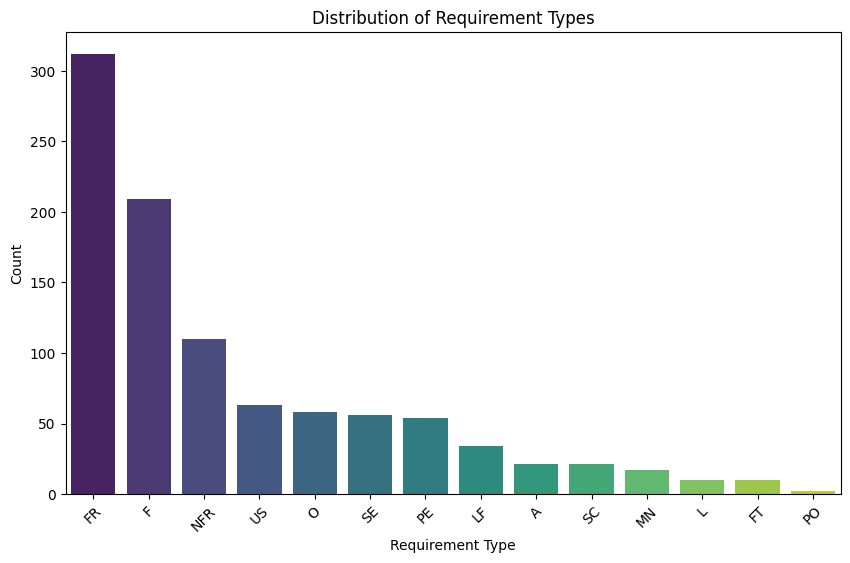

In [243]:
plt.figure(figsize=(10, 6))
sns.countplot(data=dataset_copy, x='Type', order=dataset1['Type'].value_counts().index, palette='viridis')
plt.title("Distribution of Requirement Types")
plt.xlabel("Requirement Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-244-fe4017182b08>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=category, palette='Set2')


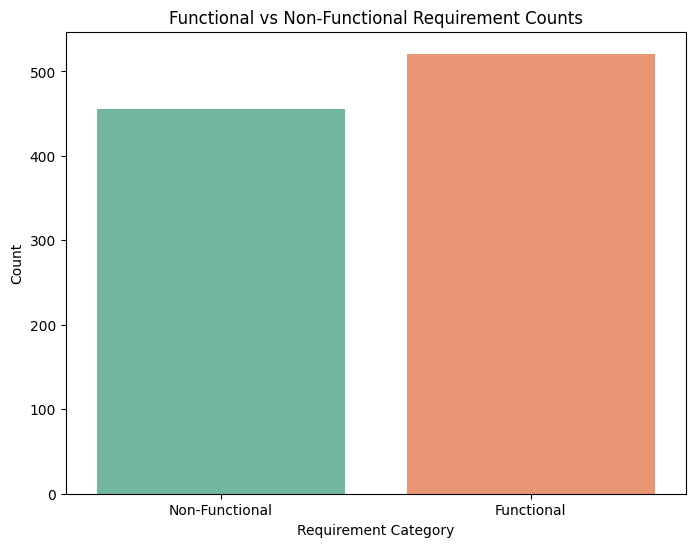

In [244]:
# Create a copy of the dataset to work with
functional_labels = ['F', 'FR']
# Apply the transformation to the copied dataset without altering the original
category = dataset_copy['Type'].apply(lambda x: 'Functional' if x in functional_labels else 'Non-Functional')

# Plot the counts
plt.figure(figsize=(8, 6))
sns.countplot(x=category, palette='Set2')
plt.title("Functional vs Non-Functional Requirement Counts")
plt.xlabel("Requirement Category")
plt.ylabel("Count")
plt.show()


Summary statistics for requirement lengths:


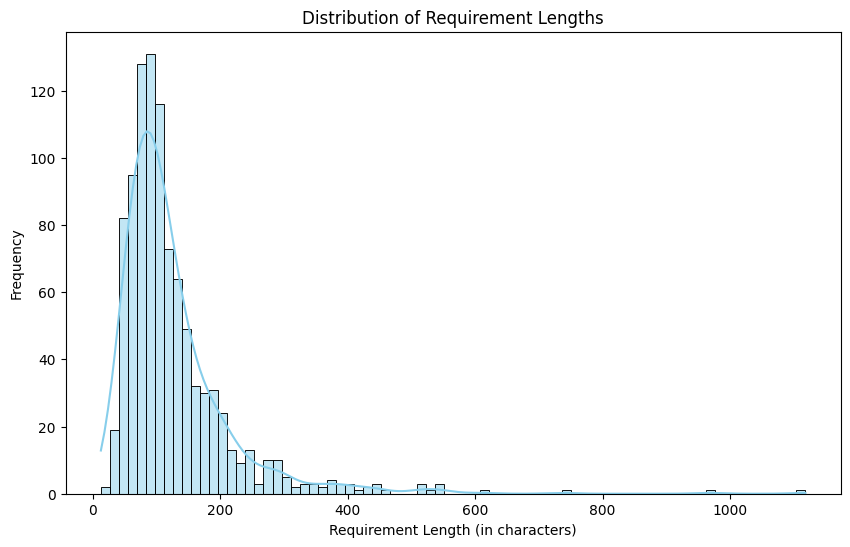

In [245]:
dataset_copy['Requirement_Length'] = dataset_copy['Requirement'].apply(len)
print("Summary statistics for requirement lengths:")
plt.figure(figsize=(10, 6))
sns.histplot(dataset_copy['Requirement_Length'], kde=True, color='skyblue')
plt.title("Distribution of Requirement Lengths")
plt.xlabel("Requirement Length (in characters)")
plt.ylabel("Frequency")
plt.show()

In [246]:
dataset_copy['Word_Count'] = dataset_copy['Requirement'].apply(lambda x: len(x.split()))   # Word count
dataset_copy['Character_Count'] = dataset_copy['Requirement'].apply(len)
print("Summary statistics for word counts:")
print(dataset_copy['Word_Count'].describe())
print("\nSummary statistics for character counts:")
print(dataset_copy['Character_Count'].describe())

Summary statistics for word counts:
count    977.000000
mean      21.146366
std       15.098178
min        2.000000
25%       12.000000
50%       17.000000
75%       24.000000
max      179.000000
Name: Word_Count, dtype: float64

Summary statistics for character counts:
count     977.000000
mean      126.743091
std        92.693852
min        13.000000
25%        75.000000
50%       103.000000
75%       146.000000
max      1118.000000
Name: Character_Count, dtype: float64


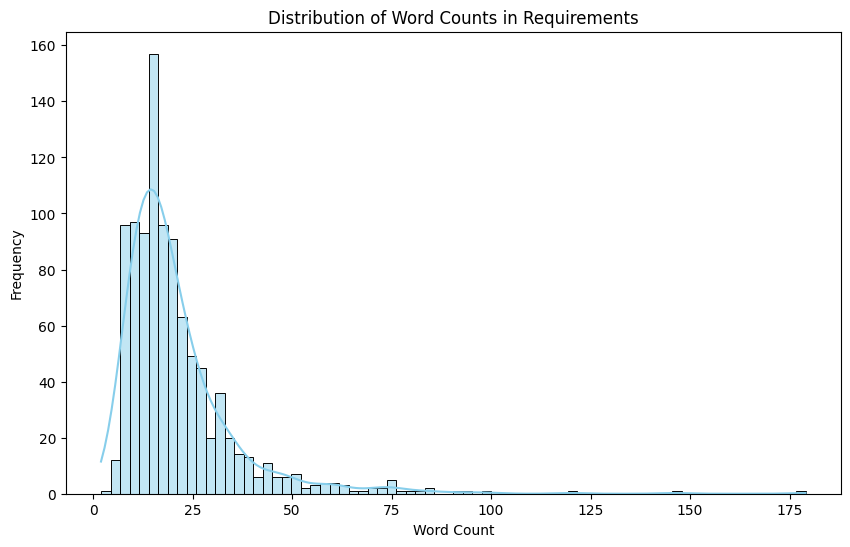

In [247]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset_copy['Word_Count'], kde=True, color='skyblue')
plt.title("Distribution of Word Counts in Requirements")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [248]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [249]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter

nltk.download('punkt')


# 1. Average Length of All Requirements
def average_length(dataset_copy):
    avg_length = dataset_copy['Requirement'].apply(len).mean()
    return avg_length

# 2. Textual Complexity Analysis
def textual_complexity(dataset_copy):
    word_lengths = dataset_copy['Requirement'].apply(lambda x: [len(word) for word in word_tokenize(x)])
    avg_word_length = word_lengths.apply(lambda x: sum(x) / len(x)).mean()
    sentence_counts = dataset_copy['Requirement'].apply(lambda x: len(sent_tokenize(x)))
    avg_sentence_length = dataset_copy['Requirement'].apply(lambda x: len(word_tokenize(x)) / len(sent_tokenize(x)))

    complexity_data = {
        'avg_word_length': avg_word_length,
        'avg_sentence_count': sentence_counts.mean(),
        'avg_sentence_length': avg_sentence_length.mean()
    }

    return complexity_data

# 3. Unique vs. Repeated Requirements
def unique_vs_repeated(dataset_copy):
    requirement_counts = dataset_copy['Requirement'].value_counts()
    repeated_requirements = requirement_counts[requirement_counts > 1]
    unique_requirements_count = len(requirement_counts[requirement_counts == 1])

    return {
        'total_requirements': len(dataset_copy),
        'unique_requirements': unique_requirements_count,
        'repeated_requirements': len(repeated_requirements),
        'repeated_requirements_list': repeated_requirements
    }

# Run the analyses
avg_length = average_length(dataset_copy)
complexity = textual_complexity(dataset_copy)
uniqueness = unique_vs_repeated(dataset_copy)

# Output results
print("Average Length of All Requirements:")
print(avg_length)

print("\nTextual Complexity:")
print(complexity)

print("\nUnique vs. Repeated Requirements:")
print(uniqueness)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Average Length of All Requirements:
126.74309109518936

Textual Complexity:
{'avg_word_length': 4.68680406618402, 'avg_sentence_count': 1.3203684749232343, 'avg_sentence_length': 17.417780377248132}

Unique vs. Repeated Requirements:
{'total_requirements': 977, 'unique_requirements': 975, 'repeated_requirements': 1, 'repeated_requirements_list': Requirement
Only registered customers can purchase streaming movies.    2
Name: count, dtype: int64}


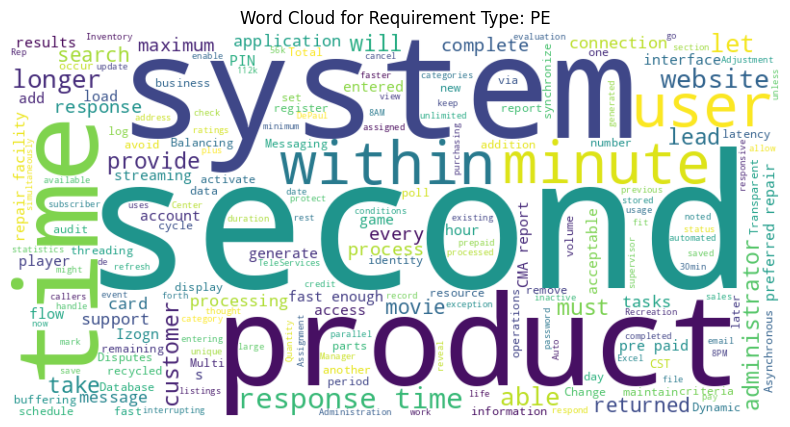

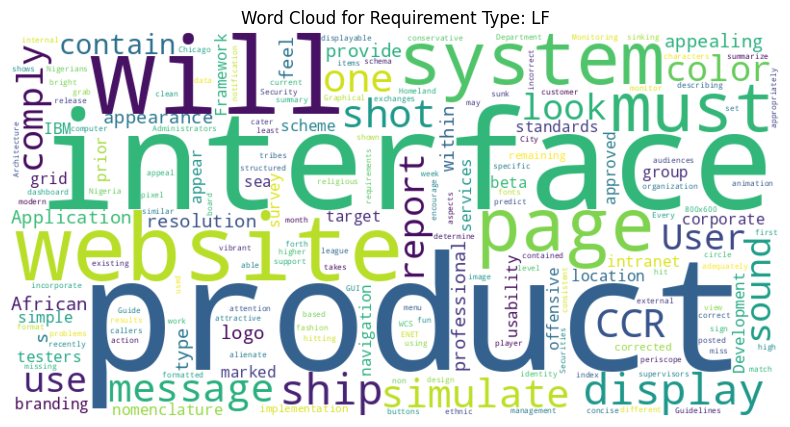

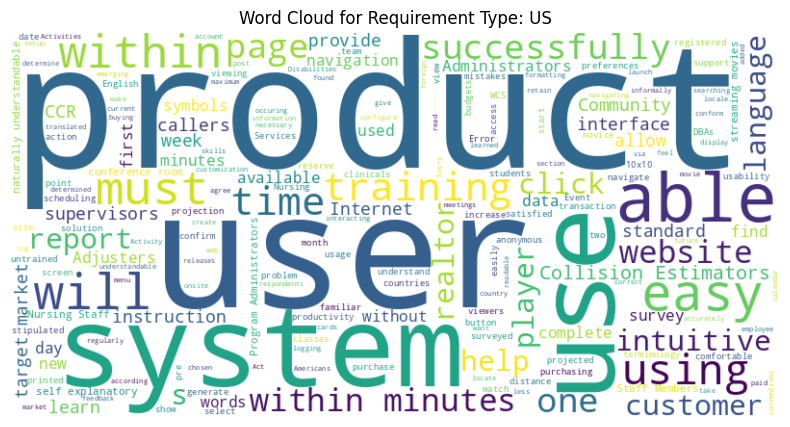

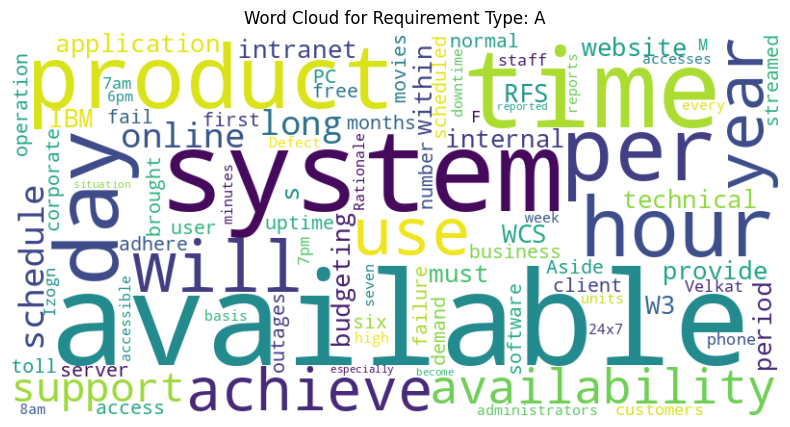

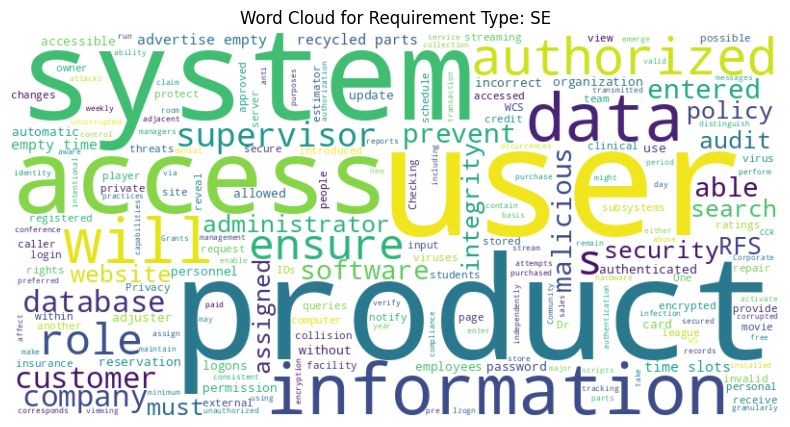

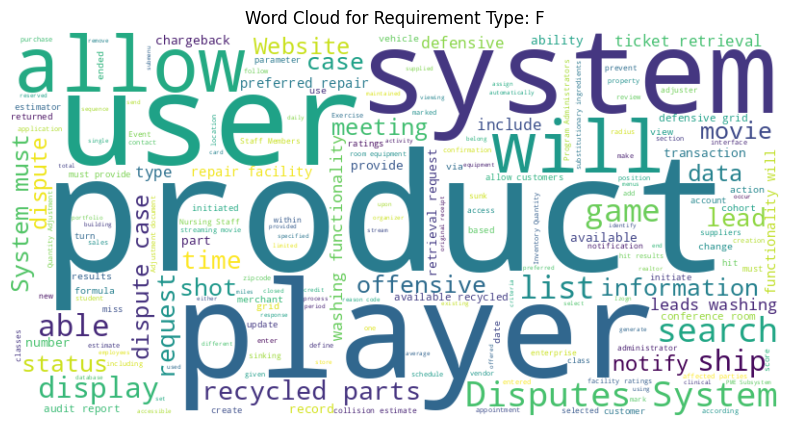

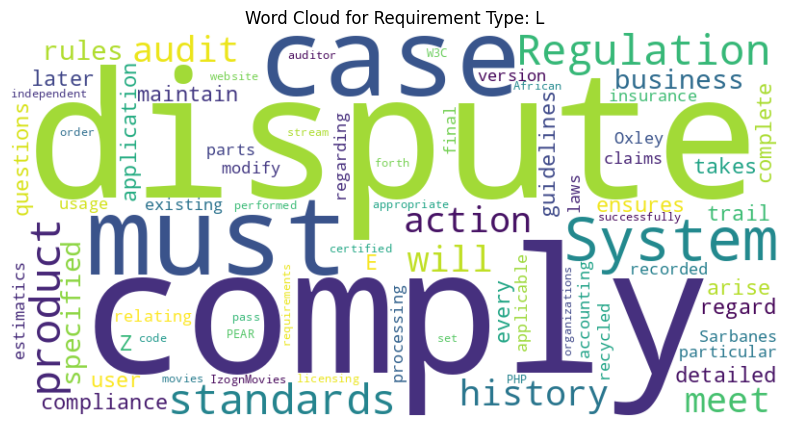

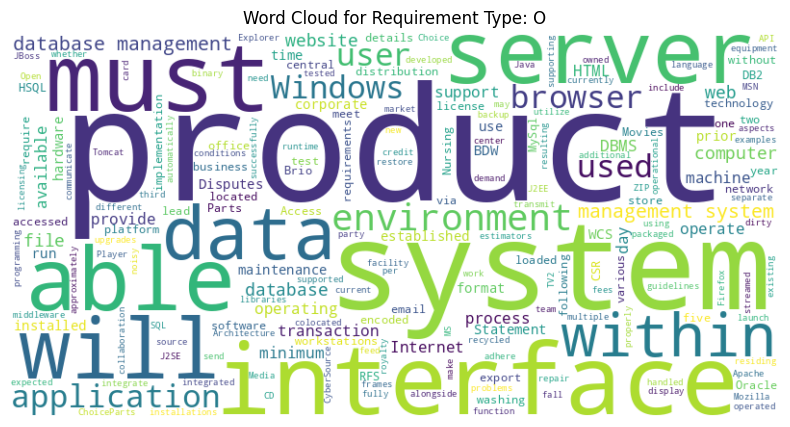

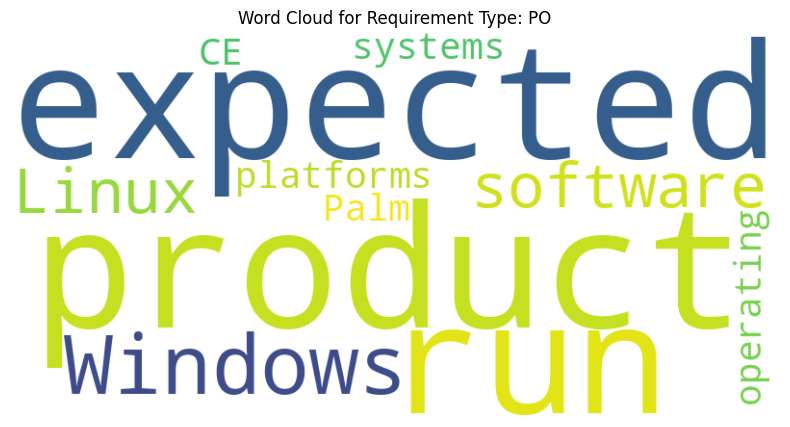

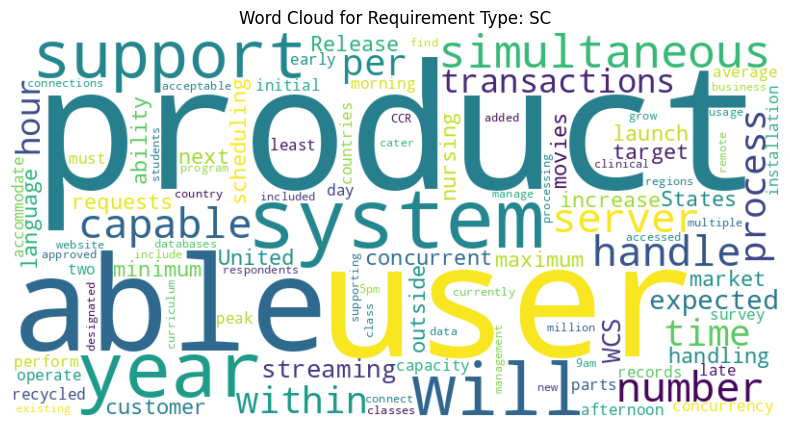

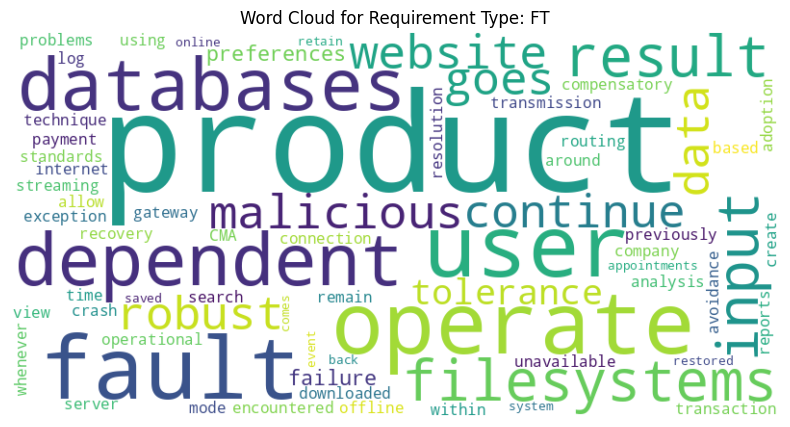

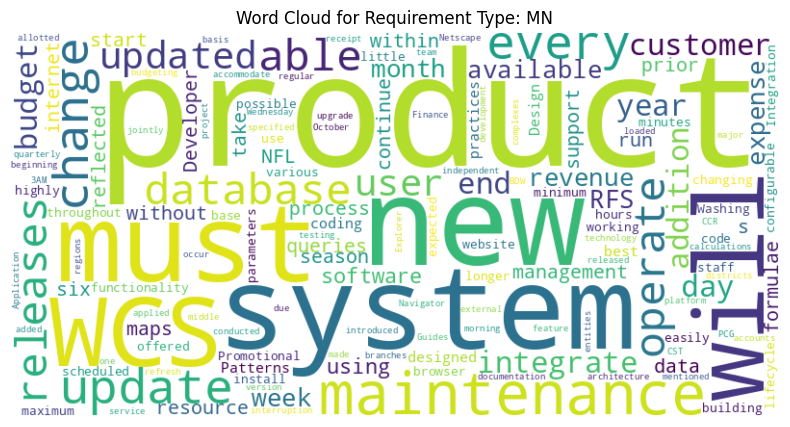

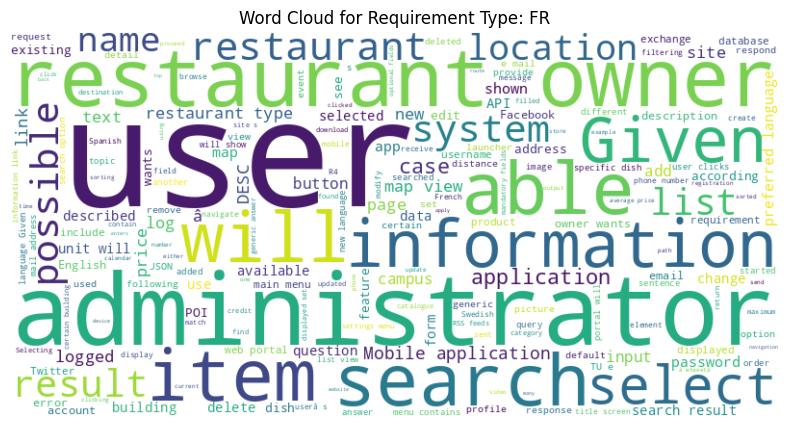

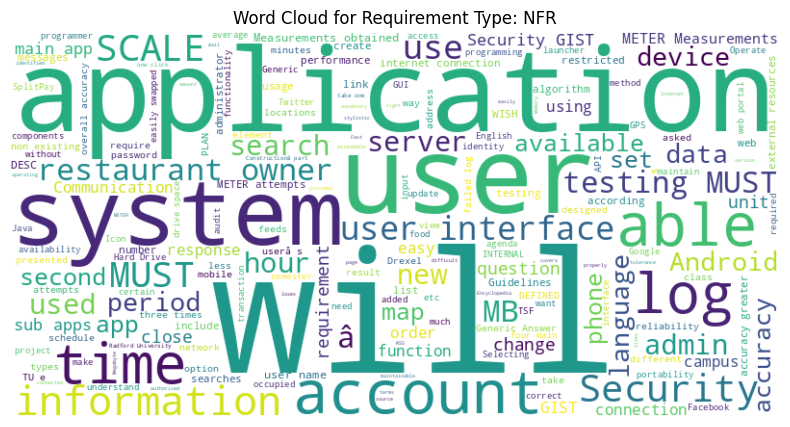

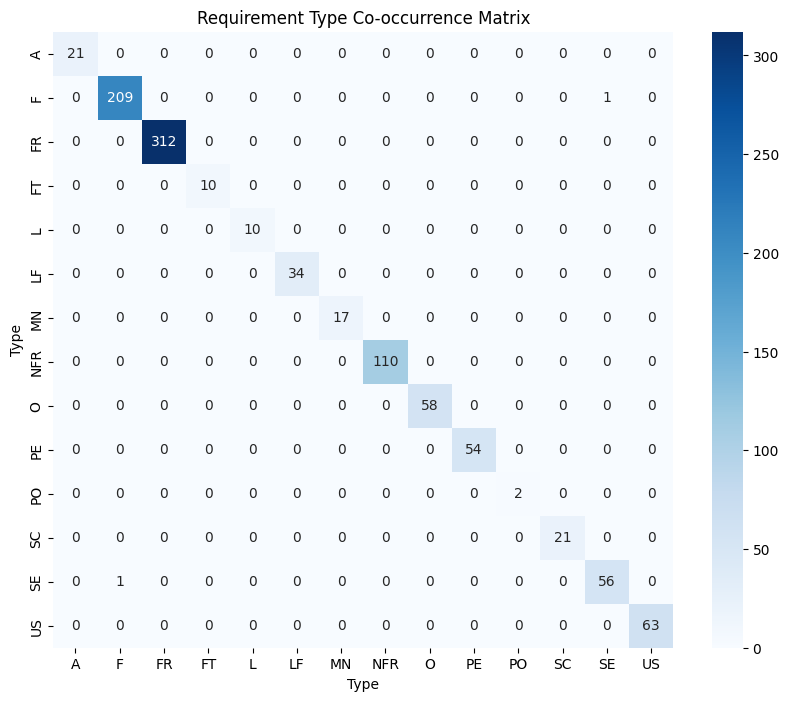

In [250]:
from wordcloud import WordCloud
def generate_word_clouds_by_type(dataset_copy):
    requirement_types = dataset_copy['Type'].unique()

    for req_type in requirement_types:
        text = " ".join(requirement for requirement in dataset_copy[dataset_copy['Type'] == req_type]['Requirement'].astype(str))
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Requirement Type: {req_type}")
        plt.show()



# 3. Requirement Type Co-occurrence Matrix
def requirement_type_cooccurrence_matrix(dataset_copy):
    # This assumes a requirement can belong to multiple types, stored as lists in the 'requirement_type' column
    dataset_copy = dataset_copy.explode('Type')  # Splits multi-type entries
    co_occurrence = pd.crosstab(dataset_copy['Requirement'], dataset_copy['Type']).T.dot(
        pd.crosstab(dataset_copy['Requirement'], dataset_copy['Type'])
    )

    plt.figure(figsize=(10, 8))
    sns.heatmap(co_occurrence, annot=True, fmt="d", cmap="Blues")
    plt.title("Requirement Type Co-occurrence Matrix")
    plt.show()

# Run visualizations
generate_word_clouds_by_type(dataset_copy)
requirement_type_cooccurrence_matrix(dataset_copy)

In [251]:
# 1. Check for Missing / Incomplete Data
def check_missing_data(dataset_copy):
    missing_data = dataset_copy.isnull().sum()
    incomplete_rows = dataset_copy[dataset_copy.isnull().any(axis=1)]

    print("Missing Data Summary:")
    print(missing_data)
    print("\nRows with Incomplete Data:")
    print(incomplete_rows)

    return missing_data, incomplete_rows

missing_data, incomplete_rows = check_missing_data(dataset1)


Missing Data Summary:
Type           0
Requirement    0
dtype: int64

Rows with Incomplete Data:
Empty DataFrame
Columns: [Type, Requirement]
Index: []


In [252]:
def check_duplicates(dataset_copy):
    duplicate_rows = dataset_copy[dataset_copy.duplicated()]
    print(f"\nNumber of Duplicate Rows: {len(duplicate_rows)}")
    print("Duplicate Rows:")
    print(duplicate_rows)

    return duplicate_rows
duplicate_rows = check_duplicates(dataset_copy)



Number of Duplicate Rows: 0
Duplicate Rows:
Empty DataFrame
Columns: [Type, Requirement, Requirement_Length, Word_Count, Character_Count]
Index: []


##**test dataset**

In [253]:
testDataSet = pd.read_csv("/content/nfr-test.csv")
testDataSet

Column1                                            Column2
0        F     The system shall display Events or Activities.
1        F   The display shall have two regions left 2/3 o...
2        F  The data displayed in both the nodes within th...
3        F  The table side of the display shall be split i...
4        F  The top 1/4 of the table will hold events that...
..     ...                                                ...
65      SE  The Disputes application shall manipulate and ...
66      SE  All updates to data files or database must be ...
67       L  The Disputes application must conform to the l...
68       L  All business rules specified in the Disputes S...
69       L  The Disputes application must conform to the l...

[70 rows x 2 columns]

In [254]:
testDataSet.rename(columns={"Column1": "Type", "Column2": "Requirement"}, inplace=True)

##**Functions**

In [255]:
## lower casing

def lower_casing(df):
  df = df.map(lambda x: x.lower() if isinstance(x, str) else x)
  return df

newDS1=lower_casing(dataset_copy)
newTestDS=lower_casing(testDataSet.copy())


In [256]:
def extract_named_entities(text):
    words = word_tokenize(text)
    pos_tags = nltk.pos_tag(words)
    named_entities = nltk.ne_chunk(pos_tags, binary=False)
    entities = []
    for chunk in named_entities:
        if hasattr(chunk, 'label'):
            entities.append((chunk.label(), ' '.join(c[0] for c in chunk)))
    return entities

In [257]:
## removing non word and non whitespaces
def remover(df):
  df = df.replace(to_replace=r'[^\w\s]', value='', regex=True)
  return df

newDS1=remover(newDS1)
newTestDS=remover(newTestDS)

In [258]:
## removing digits
def digit_remover(df):
  df = df.replace(to_replace=r'\d', value='', regex=True)
  return df

newDS1=digit_remover(newDS1)
newTestDS=digit_remover(newTestDS)


In [259]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [260]:
## remove puncituation
def remove_punc(df,label):
  xx= []
  for i in range(len(df[label])):
    temp =df[label][i]
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in temp.split()]
    stripped = ' '.join(stripped)
    xx.append(stripped)
  return xx

newDS1['Requirement']=remove_punc(newDS1,'Requirement')
newTestDS['Requirement']=remove_punc(newTestDS,'Requirement')



In [261]:
## before stepping into integration and tokenization phase we just make sure all our datasets have the same features
print(newDS1['Type'].unique())
print(newTestDS['Type'].unique())

['pe' 'lf' 'us' 'a' 'se' 'f' 'l' 'o' 'po' 'sc' 'ft' 'mn' 'fr' 'nfr']
['f' 'lf' 'us' 'o' 'se' 'l']


In [262]:
## check if all sentences are written in english characters
def count_non_english_characters(df,label):
  count =[]
  for i in range(len(df[label])):
    non_english_chars = re.findall(r'[^a-zA-Z\s]', df[label][i])
    if non_english_chars:  print(non_english_chars , df[label][i])
    count.append(len(non_english_chars))
    # count = len(non_english_chars)
  return sum(count)  # Output: 8


In [263]:
## dataset 1
x=count_non_english_characters(newDS1,'Requirement')
print('Number of non english  characters : ' , x)

['â', 'â'] the twitter âtweetâ interface should be according to the twitter guidelines
['â', 'â'] the facebook âlikeâ interface should be according to the facebook guidelines
['â'] hard drive space gist hard drive space scale the applicationâs need of hard drive space meter mb must no more than mb plan no more than mb wish no more than mb mb defined megabyte
['â', 'œ', 'â', 'â'] design constraints we will use âœwaterfall methodâ and object â oriented programming paradigm we will use java as programming language the android version of the device should be or higher the system requires internet connection all the time
['â'] â the system will be designed in such a way that the algorithms for the four main units will be able to be easily swapped out
['â'] the overall accuracy of the web apiâs response will be measured using a developermade testing set
['â'] the accuracy of the generic question constructionâ part will be close to
['â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â', 'â'] 

In [264]:
##test dataset
z=count_non_english_characters(newTestDS,'Requirement')
print('Number of non english  characters : ' , z)

Number of non english  characters :  0


In [265]:
## removing the non english
def remove_non_english_characters(df,label):
  x=[]
  for i in range(len(df[label])):
    temp = df[label][i]
    non_english_chars = re.sub(r'[^a-zA-Z\s]', '', temp)
    x.append(non_english_chars)
  return x

newDS1['Requirement']=remove_non_english_characters(newDS1,'Requirement')
newTestDS['Requirement']=remove_non_english_characters(newTestDS,'Requirement')

## testing our work
print('Number of non english characters dataset 1 : ',count_non_english_characters(newDS1,'Requirement') ,'\nNumber of non english  characters : ',
count_non_english_characters(newTestDS,'Requirement'))

Number of non english characters dataset 1 :  0 
Number of non english  characters :  0



## stemming :  Convert words to their base forms to reduce redundancy.
## lemmatization :  Convert words to their base forms to reduce redundancy.
##named entity recognition :  Identify entities such as people, systems, dates, etc., which could be crucial in defining use cases.



## **Note** : that the differnece between stemming and lemmatization is that

1 ) meaning
stemming : meaning isn't important to me or the proccess
lemmatization : meaning is very important ans=d can actually determine the output

2) based
stemming : rule approch based where it focuses on finding the words with the same root no matter thier meaning
lemmatization : dictionary based approch where it traces the word back to it's root and determine it's meaning based on :-
                        1 - it's dictionary meaning and
                        2 - it's position in the sentence  
3)accuracy
lemmataization is more accurate the stemming

****Ex :  studies****


stemming output : **studi** based on it can be studies or studied
lemmatzation output : **study** based on studies means in the dictionary the action of studying with it's infinitive form is study


In [266]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True


##**Remove Stop Words** :  remove common ones that don't contribute to understanding requirements.

In [267]:


def remove_SW(ds,label):
  x = []
  for i in range(len(ds[label])):
    words = word_tokenize(ds[label][i])
    stop_words = set(stopwords.words('english'))
    filtered_sentence = [word for word in words if word.lower() not in stop_words]
    filtered_sentence = ' '.join(filtered_sentence)
    # print("Filtered Sentence (without stop words):", filtered_sentence)
    x.append(filtered_sentence)
  return x


newDS1['Requirement']=remove_SW(newDS1,'Requirement')
newTestDS['Requirement']=remove_SW(newTestDS,'Requirement')




##**Tokenization** : Split the transcribed text into sentences and words.



In [268]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Function to tokenize and pad the sequences
def tokenize_and_pad_sequences(train_data, test_data):
    # Get unique words from the training data
    unique_words = set(train_data['Requirement'])
    num_unique_words = len(unique_words)

    # Initialize the tokenizer with OOV token
    tokenizer = Tokenizer(num_words=num_unique_words, oov_token="<OOV>")

    # Fit tokenizer on the training data
    tokenizer.fit_on_texts(train_data['Requirement'])

    # Convert the training data to sequences
    train_sequences = tokenizer.texts_to_sequences(train_data['Requirement'])

    # Calculate the length of the longest sequence in the training data
    maxlen = max(len(seq) for seq in train_sequences)

    # Pad the training sequences to the length of the longest sequence
    padded_train_sequences = pad_sequences(train_sequences, maxlen=maxlen)

    # Convert the test data to sequences
    test_sequences = tokenizer.texts_to_sequences(test_data['Requirement'])

    # Pad the test sequences to the same length as the training sequences
    padded_test_sequences = pad_sequences(test_sequences, maxlen=maxlen)

    return padded_train_sequences, padded_test_sequences, tokenizer

# Apply the function to your datasets
padded_train, padded_test, tokenizer = tokenize_and_pad_sequences(newDS1, newTestDS)

# Print the padded sequences if needed
print("\nPadded Train Sequences:")
print(padded_train)

print("\nPadded Test Sequences:")
print(padded_test)



Padded Train Sequences:
[[  0   0   0 ...  44  86  33]
 [  0   0   0 ... 539   1  69]
 [  0   0   0 ...  17 281 146]
 ...
 [  0   0   0 ...  90 114  53]
 [  0   0   0 ... 583 401   1]
 [  0   0   0 ...  57   1  13]]

Padded Test Sequences:
[[  0   0   0 ...  44 147 869]
 [  0   0   0 ...  44  17 686]
 [  0   0   0 ...   1   1  17]
 ...
 [  0   0   0 ... 331 347   1]
 [  0   0   0 ... 331 347   1]
 [  0   0   0 ... 155  40 345]]


## **Speech Tagging** : Tagging: Understand the role each word plays in the sentence to help identify action verbs (e.g., "must", "should", "requires") related to requirements.

In [269]:

# Assume the text is already tokenized
tokenized_sentence = ['The', 'system', 'should', 'process', 'orders', 'quickly', 'and', 'efficiently', '.']

# Perform POS tagging on the tokenized sentence
pos_tags = nltk.pos_tag(word_index)

# Display the result
print("POS Tags:", pos_tags)


POS Tags: [('<OOV>', 'JJ'), ('shall', 'MD'), ('user', 'VB'), ('product', 'NN'), ('system', 'NN'), ('able', 'JJ'), ('restaurant', 'NN'), ('users', 'NNS'), ('search', 'VBP'), ('application', 'NN'), ('must', 'MD'), ('information', 'NN'), ('time', 'NN'), ('administrator', 'NN'), ('owner', 'NN'), ('use', 'NN'), ('data', 'NNS'), ('available', 'JJ'), ('within', 'IN'), ('list', 'NN'), ('website', 'VB'), ('given', 'VBN'), ('new', 'JJ'), ('view', 'NN'), ('case', 'NN'), ('allow', 'JJ'), ('results', 'NNS'), ('language', 'NN'), ('player', 'NN'), ('interface', 'NN'), ('possible', 'JJ'), ('map', 'NN'), ('seconds', 'NNS'), ('provide', 'VBP'), ('access', 'NN'), ('account', 'NN'), ('page', 'NN'), ('mobile', 'JJ'), ('select', 'NN'), ('disputes', 'VBZ'), ('database', 'JJ'), ('number', 'NN'), ('one', 'CD'), ('display', 'NN'), ('parts', 'NNS'), ('preferred', 'VBD'), ('type', 'NN'), ('used', 'VBN'), ('link', 'NN'), ('name', 'NN'), ('items', 'NNS'), ('desc', 'JJ'), ('response', 'NN'), ('set', 'VBN'), ('using'

word_tokenize(text): Tokenizes the text into individual words.

nltk.pos_tag(tokens): Tags each word with its respective Part-of-Speech (POS), such as:

NN = Noun

VB = Verb

RB = Adverb

DT = Determiner, etc.

POS Tags Key (Examples):

NN: Noun (singular)

NNS: Noun (plural)

VB: Verb (base form)

VBD: Verb (past tense)

RB: Adverb

JJ: Adjective

## **lemmatization** : refers to understanding the context of the word it's more of a dictnory based method

> Add blockquote



Ex : studies => study
\


In [270]:
lemmatizer = WordNetLemmatizer()


def lemmatization(df , label):
  x=[]
  for i in range(len(df[label])):
    temp = df[label][i]
    words = word_tokenize(temp)
    tag = nltk.pos_tag([temp])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    ff= tag_dict.get(tag, wordnet.NOUN)
    lemmatized_words = [lemmatizer.lemmatize(word.lower(), ff) for word in words]

    # Join the lemmatized words back into a sentence
    lemmatized_sentence = ' '.join(lemmatized_words)
    x.append(lemmatized_sentence)
  return x

xx=lemmatization(newDS1,'Requirement')

xx











['system shall refresh display every second',
 'application shall match color schema set forth department homeland security',
 'projected data must readable x projection screen viewer must able read event activity data viewing distance',
 'product shall available normal business hour long user access client pc system available time first six month operation',
 'projected data must understandable x projection screen viewer must able determine event activity occuring current time viewing distance',
 'product shall ensure accessed authorized user product able distinguish authorized unauthorized user access attempt',
 'product shall intuitive selfexplanatory',
 'product shall respond fast keep uptodate data display',
 'system shall mdi form allows viewing graph data table',
 'system shall display event vertical table time',
 'system shall display event graph time',
 'business rule specified dispute system shall compliance guideline regulation e regulation z',
 'dispute application must mai